In [ ]:
%matplotlib inline

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
!nvidia-smi

Tue Nov 26 20:14:45 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]
)

batch_size = 1024

trainset = torchvision.datasets.CIFAR10(root= './data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship'
'truck')




100%|██████████| 170M/170M [00:05<00:00, 28.5MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
print(len(testset))

10000


In [ ]:
50000/1024

48.828125

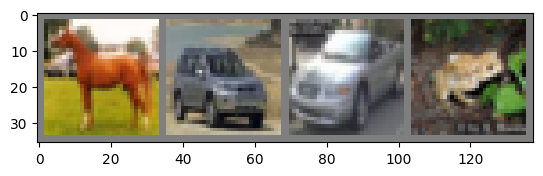

horse   car   car  frog


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
  img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

#get random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images[0:4,:,:]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1) # flatten all dimension except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)


In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2): #loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)


        #zero the parameter gradients
        optimizer.zero_grad()

        #forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #print statistics
        running_loss += loss.item()
        if i % 30 == 29: # print every 30 mini-batches
          print('[%d, %5d] loss: %.3f' %
           (epoch + 1, i + 1, running_loss/30))
          running_loss = 0.0

[1,    30] loss: 1.476
[1,    60] loss: 1.723
[1,    90] loss: 1.613
[1,   120] loss: 1.776
[1,   150] loss: 1.688
[1,   180] loss: 1.565
[1,   210] loss: 1.693
[1,   240] loss: 1.652
[1,   270] loss: 1.650
[1,   300] loss: 1.578
[1,   330] loss: 1.592
[1,   360] loss: 1.643
[1,   390] loss: 1.585
[1,   420] loss: 1.617
[1,   450] loss: 1.659
[1,   480] loss: 1.543
[1,   510] loss: 1.618
[1,   540] loss: 1.812
[1,   570] loss: 1.662
[1,   600] loss: 1.774
[1,   630] loss: 1.561
[1,   660] loss: 1.548
[1,   690] loss: 1.578
[1,   720] loss: 1.609
[1,   750] loss: 1.701
[1,   780] loss: 1.428
[1,   810] loss: 1.710
[1,   840] loss: 1.546
[1,   870] loss: 1.790
[1,   900] loss: 1.594
[1,   930] loss: 1.592
[1,   960] loss: 1.709
[1,   990] loss: 1.685
[1,  1020] loss: 1.641
[1,  1050] loss: 1.659
[1,  1080] loss: 1.718
[1,  1110] loss: 1.727
[1,  1140] loss: 1.570
[1,  1170] loss: 1.548
[1,  1200] loss: 1.673
[1,  1230] loss: 1.619
[1,  1260] loss: 1.594
[1,  1290] loss: 1.457
[1,  1320] 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

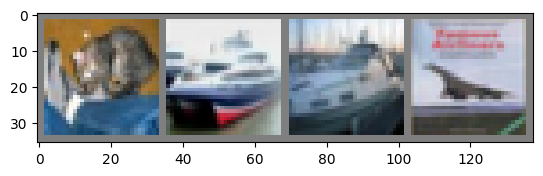

GroundTruth:    cat shiptruck shiptruck plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images[0:4,:,:]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

NameError: name 'Net' is not defined

In [ ]:
outputs = net(images)


NameError: name 'net' is not defined

In [ ]:
outputs.shape

In [ ]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))


NameError: name 'torch' is not defined

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

In [ ]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predictions = torch.max(outputs, 1)
    # collect the correct predictions for each class
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[classes[label]] += 1
      total_pred[classes[label]] += 1

for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print("Accuracy for class {:5s} is: {:.1f} %".format(classname, accuracy))